# Imports


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt

# Carregando o DataSet

In [2]:
dataset = tf.keras.datasets.fashion_mnist
((imagens_treino,identificacoes_treino),(imagens_teste, identificacoes_teste  )) = dataset.load_data()

# Explorar os dados

In [3]:
imagens_treino.shape

(60000, 28, 28)

In [4]:
imagens_teste.shape

(10000, 28, 28)

In [5]:
identificacoes_treino.shape

(60000,)

In [6]:
identificacoes_teste.shape

(10000,)

In [7]:
total_de_classificacoes = len(np.unique(identificacoes_treino))
total_de_classificacoes

10

In [8]:
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco','Sandália','Camisa', 'Tênis','Bolsa','Bota']
nomes_de_classificacoes

['Camiseta',
 'Calça',
 'Pullover',
 'Vestido',
 'Casaco',
 'Sandália',
 'Camisa',
 'Tênis',
 'Bolsa',
 'Bota']

# Exibir os dados

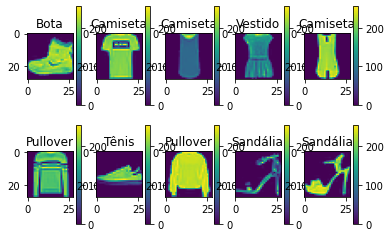

In [9]:
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
    plt.colorbar()

# Normalizando as imagens

In [10]:
imagens_treino = imagens_treino/float(255)

# Criando, compilando, treinando e normalizando o modelo

In [11]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 12s 7ms/step - loss: 0.5285 - accuracy: 0.8129 - val_loss: 0.4011 - val_accuracy: 0.8548
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3969 - accuracy: 0.8553 - val_loss: 0.3675 - val_accuracy: 0.8687
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3627 - accuracy: 0.8668 - val_loss: 0.3579 - val_accuracy: 0.8701
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3376 - accuracy: 0.8742 - val_loss: 0.3471 - val_accuracy: 0.8714
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3223 - accuracy: 0.8809 - val_loss: 0.3309 - val_accuracy: 0.8800


# Salvando e carregando o modelo treinado

In [12]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

# Visualizando as acurácias de treino e validação por Época

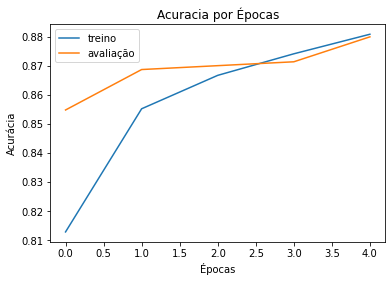

In [13]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acuracia por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['treino', 'avaliação'])

# Visualizando as perdas de treino e validação por Época

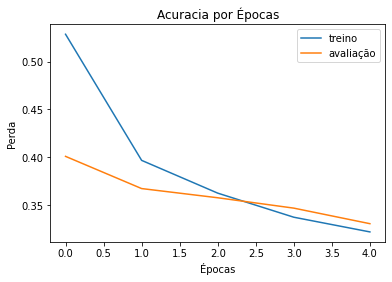

In [14]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Acuracia por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['treino', 'avaliação'])

# Testando o modelo e o modelo salvo

In [15]:
testes = modelo.predict(imagens_teste)
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)

In [16]:
print(f'Resultado do teste: {np.argmax(testes[2])}')
print(f'Número da imagem de teste: {identificacoes_teste[2]}')

Resultado do teste: 1
Número da imagem de teste: 1


# Avaliando os modelos

In [17]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
perda_teste_salvo, acuracia_teste_salvo = modelo_salvo.evaluate(imagens_teste, identificacoes_teste)

313/313 [==============================] - 1s 2ms/step - loss: 57.8786 - accuracy: 0.8551


In [18]:
print(f'Perda do teste: {perda_teste:.2f}')
print(f'Acurácia do teste: {acuracia_teste:.2f}')
print(f'Perda do teste salvo: {perda_teste_salvo:.2f}')
print(f'Acurácia do teste salvo: {acuracia_teste_salvo:.2f}')

Perda do teste: 57.88
Acurácia do teste: 0.86
Perda do teste salvo: 57.88
Acurácia do teste salvo: 0.86
